In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
conversion = pd.read_csv('conversion.csv')

In [11]:
conversion.head()

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

In [6]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
conversion.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [10]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

### Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

### Сколько уникальных рекламных кампаний было проведено? 

#### Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [12]:
conversion.xyz_campaign_id.nunique()

3

### Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

In [42]:
fb_id_impressions = conversion.groupby('fb_campaign_id') \
    .agg({'Impressions':'sum'})

In [44]:
fb_id_impressions.Impressions = np.log(fb_id_impressions.Impressions)

In [45]:
fb_id_impressions

Impressions
fb_campaign_id             
103916             8.902456
103917             9.790375
103920             6.541030
103928             9.035034
103929             7.557473
...                     ...
179977            13.937527
179978            13.365386
179979            11.928546
179981            13.580108
179982            13.148345

[691 rows x 1 columns]

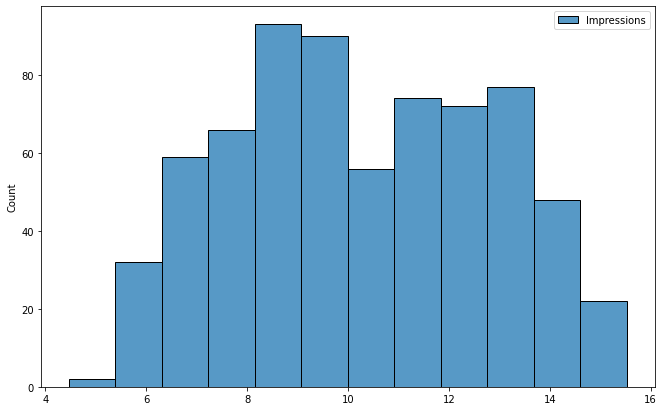

In [79]:
plt.figure(figsize=(11,7))
sns.histplot(fb_id_impressions)

### Полученное распределение не является нормальным, распределение бимодальное

### Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [49]:
conversion['CTR'] = conversion.Clicks / conversion.Impressions

In [68]:
conversion.loc[conversion['CTR'] == conversion.CTR.max()]

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
150  738637              936          109857  45-49      F        24   

     Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  \
150          944       1   1.42                 1                    0   

          CTR  
150  0.001059

### Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

In [74]:
xyz_campaign_id_916_CTR = conversion.loc[conversion['xyz_campaign_id'] == 916][['CTR']]

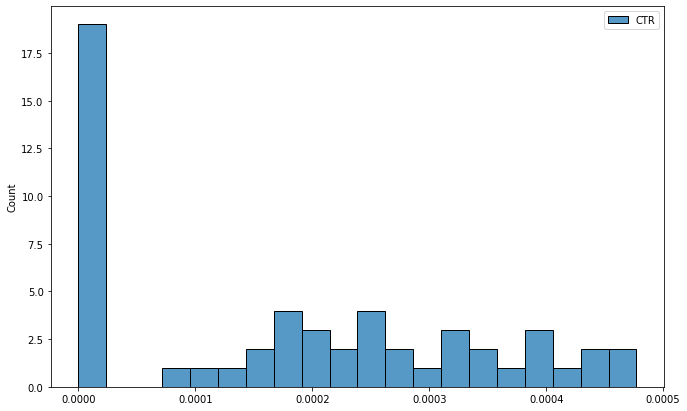

In [80]:
plt.figure(figsize=(11,7))
sns.histplot(xyz_campaign_id_916_CTR, bins=20)

### CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов: Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки. Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [81]:
conversion['CPC'] = conversion.Spent / conversion.Clicks

In [86]:
CPC = conversion['CPC'].dropna()

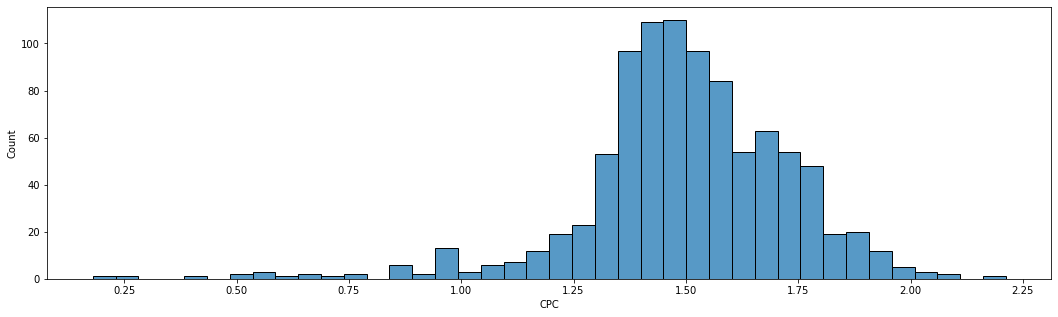

In [92]:
plt.figure(figsize=(18,5))
sns.histplot(CPC)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


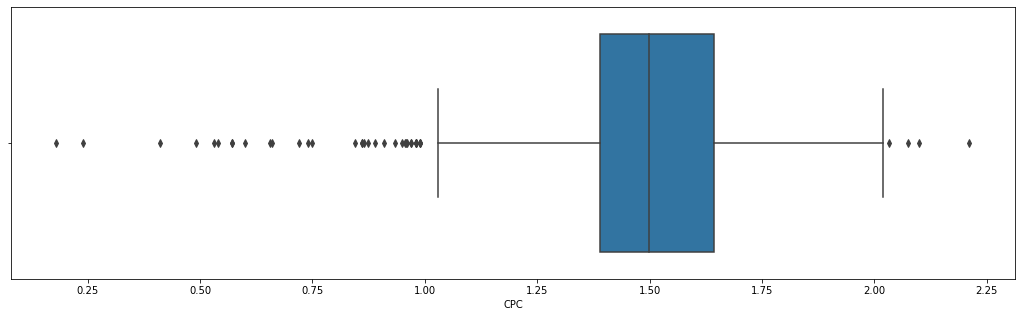

In [91]:
plt.figure(figsize=(18,5))
sns.boxplot(CPC)

In [93]:
CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [97]:
round(1.644364-1.390000,2)

0.25

### Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

In [107]:
CPC_Male = conversion.query('gender == "M"')['CPC'].dropna()

In [108]:
CPC_Female = conversion.query('gender == "F"')['CPC'].dropna()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


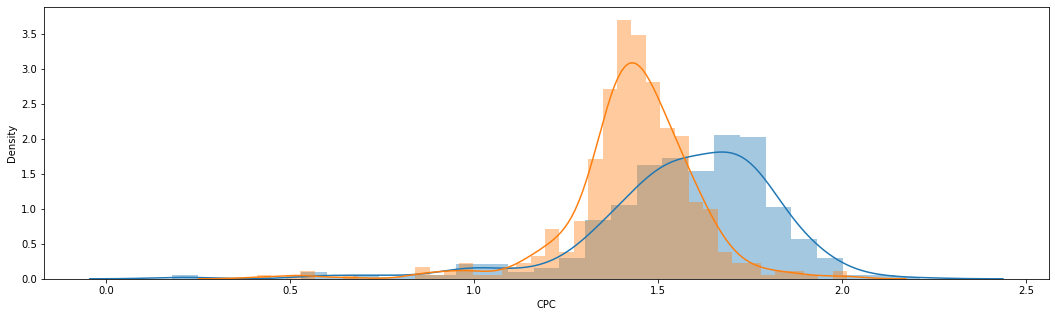

In [111]:
plt.figure(figsize=(18,5))
sns.distplot(CPC_Male)
sns.distplot(CPC_Female)

### Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. 

In [117]:
conversion['CR'] = round((conversion.Approved_Conversion / conversion.Clicks)*100,2)

In [121]:
conversion.loc[conversion['ad_id'] == 1121814].CR

860    3.09
Name: CR, dtype: float64